***Task # 4 - To Explore Decision Tree Algorithm on iris Dataset***
------------------------------------------------------------------------------------------

In [3]:
# Loading Dataset and checking structure and summary of the dataset

Iris <- read.csv("C:/Users/91889/Downloads/Iris.csv")
str(iris)
summary(iris)


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [54]:
# dropping Id column
iris=iris[, !(names(iris)%in% c("Id"))]
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


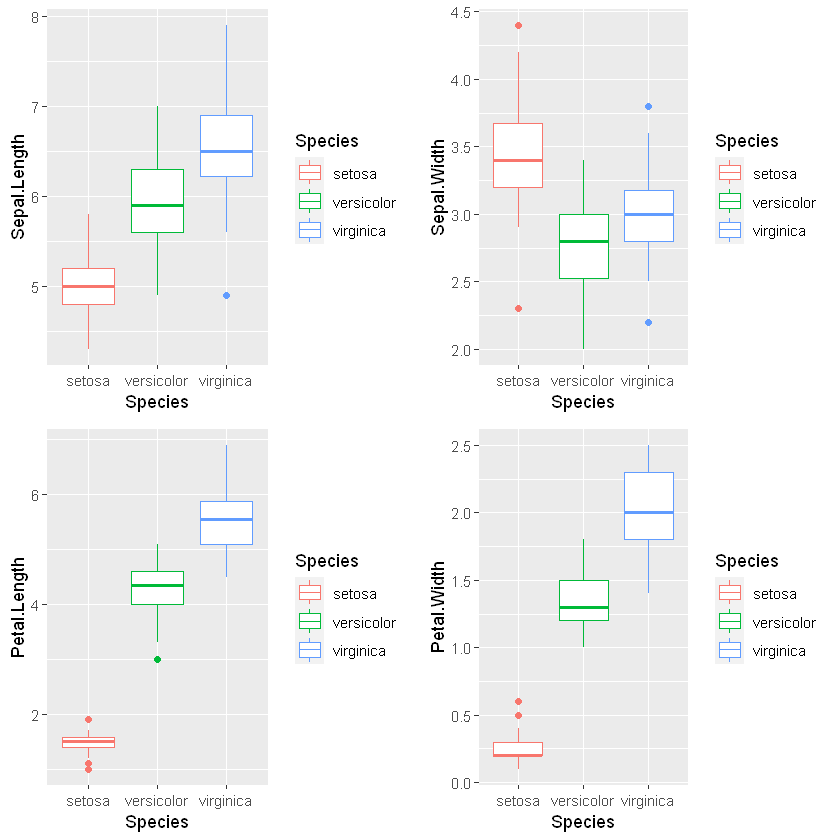

In [74]:
# importing library ggplot2 and gridextra 

library(ggplot2)
library(gridExtra)
ggplot(iris,aes(x=Species,y=Sepal.Length,color=Species))+geom_boxplot()-> Sepal_length
ggplot(iris,aes(x=Species,y=Sepal.Width,color=Species))+geom_boxplot()-> Sepal_width
ggplot(iris,aes(x=Species,y=Petal.Length,color=Species))+geom_boxplot()-> petal_length
ggplot(iris,aes(x=Species,y=Petal.Width,color=Species))+geom_boxplot()-> petal_width
grid.arrange(Sepal_length,Sepal_width,petal_length,petal_width,nrow=2) 


In [ ]:
# Splitting dataset into train and test dataset 

set.seed(555)
split=sample(2,nrow(iris),replace = TRUE,prob = c(0.75,0.25))
train=iris[split==1, ]
test=iris[split==2, ]

<b>Data got splitted into train and test. 75% data went to Train and 25% data went to Test dataset.

Decision Tree classifier Model
-------------------------------------------


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  112 

1) Petal.Length <= 1.9; criterion = 1, statistic = 104.217
  2)*  weights = 41 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 48.095
    4) Petal.Length <= 4.7; criterion = 0.987, statistic = 8.663
      5)*  weights = 33 
    4) Petal.Length > 4.7
      6)*  weights = 7 
  3) Petal.Width > 1.7
    7)*  weights = 31 

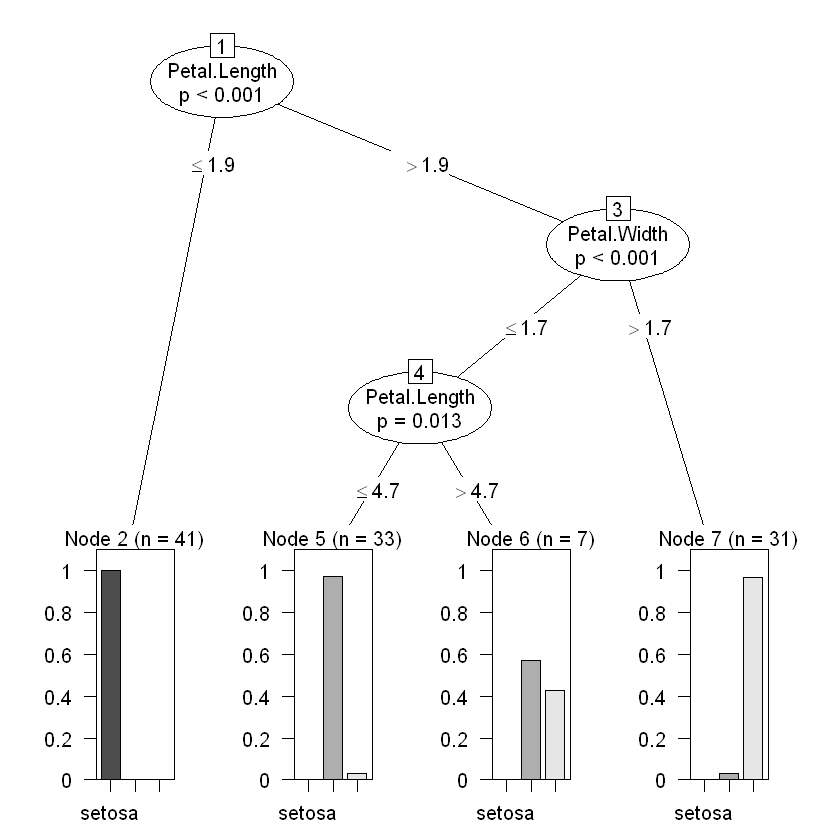

In [48]:
# Importing Party library and creating a model

library(party)
tree=ctree(Species~.,train)
tree
plot(tree)

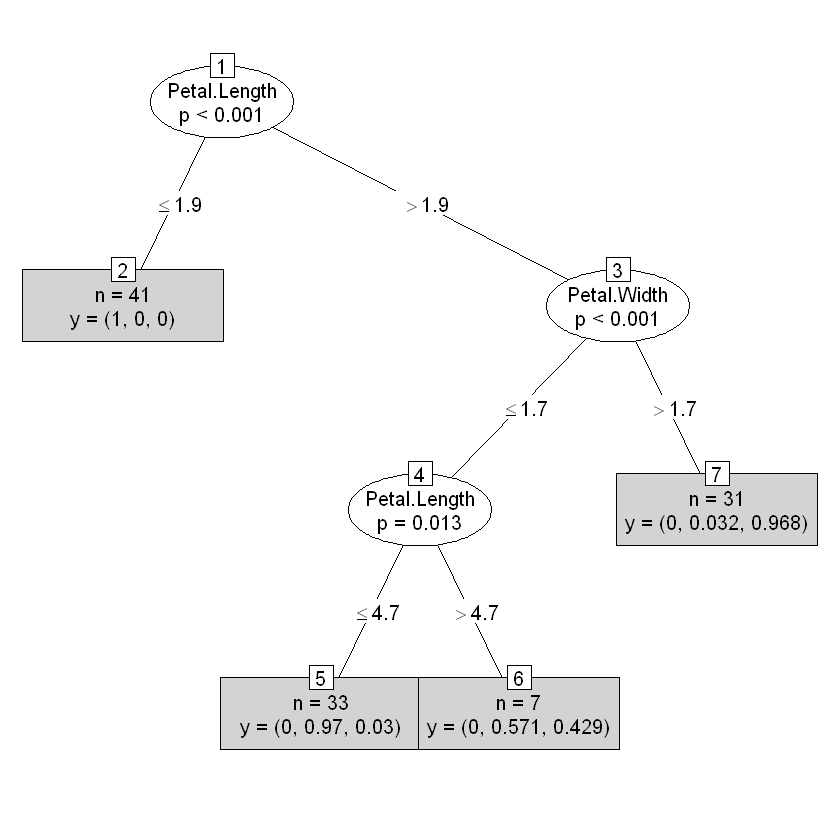

In [53]:
plot(tree,type='simple')

In [9]:
head(train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa


<b>So from above tree structure we found that if petal length is 1.4 which is less than 1.9 then there is high probablity for
setosa species which is correctly predicted 

In [59]:
tail(train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
141,6.7,3.1,5.6,2.4,virginica
143,5.8,2.7,5.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
149,6.2,3.4,5.4,2.3,virginica


<b>So from above tree structure we found that if petal length is 5.6 which is greater than 1.7 then there is high probablity 
for virginica species which is correctly predicted 

In [55]:
# Prediction with train dataset
p1=predict(tree,train)
p1

# Missclassification error-Train data
tab1=table(pred=p1,Actual=train$Species)
tab1


[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor virginica  versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] virginica  virginica  virginica  versicolor virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  versicolor virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  versicolor virginica  virginica 
[103] virginica  versicolor virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

            Actual
pred         setosa versicolor virginica
  setosa         41          0         0
  versicolor      0         36         4
  virginica       0          1        30

In [13]:
# Accuracy 
1-sum(diag(tab1)/sum(tab1))

[1] 0.04464286

In [56]:
# Prediction with test dataset
p2=predict(tree,test)
p2

# Missclassification error-Test data
tab2=table(pred=p2,Actual=test$Species)
tab2


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     versicolor versicolor versicolor
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  virginica 
[25] virginica  virginica  virginica  virginica  virginica  virginica 
[31] versicolor virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica 
Levels: setosa versicolor virginica

            Actual
pred         setosa versicolor virginica
  setosa          9          0         0
  versicolor      0         13         1
  virginica       0          0        15

In [15]:
# Accuracy
1-sum(diag(tab2)/sum(tab2))

[1] 0.02631579

In [35]:
# Importing rpart Library
library(rpart)
tree1=rpart(Species~.,train)
tree1


n= 112 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 112 71 setosa (0.36607143 0.33035714 0.30357143)  
  2) Petal.Length< 2.45 41  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 71 34 versicolor (0.00000000 0.52112676 0.47887324)  
    6) Petal.Width< 1.75 40  4 versicolor (0.00000000 0.90000000 0.10000000) *
    7) Petal.Width>=1.75 31  1 virginica (0.00000000 0.03225806 0.96774194) *

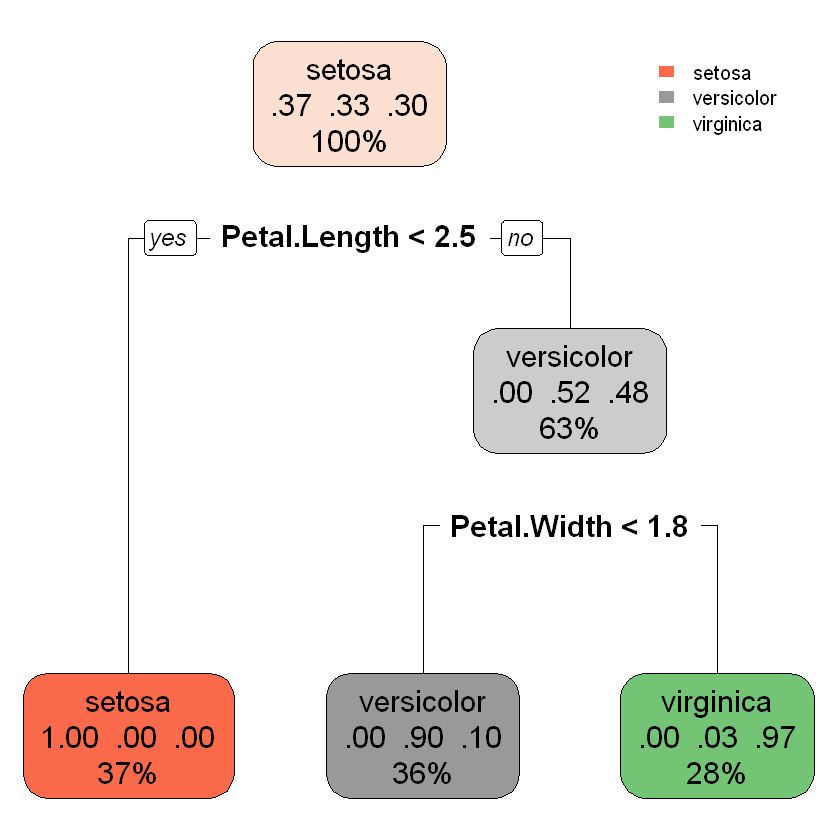

In [44]:
library(rpart.plot)
rpart.plot(tree1,cex=1.5)


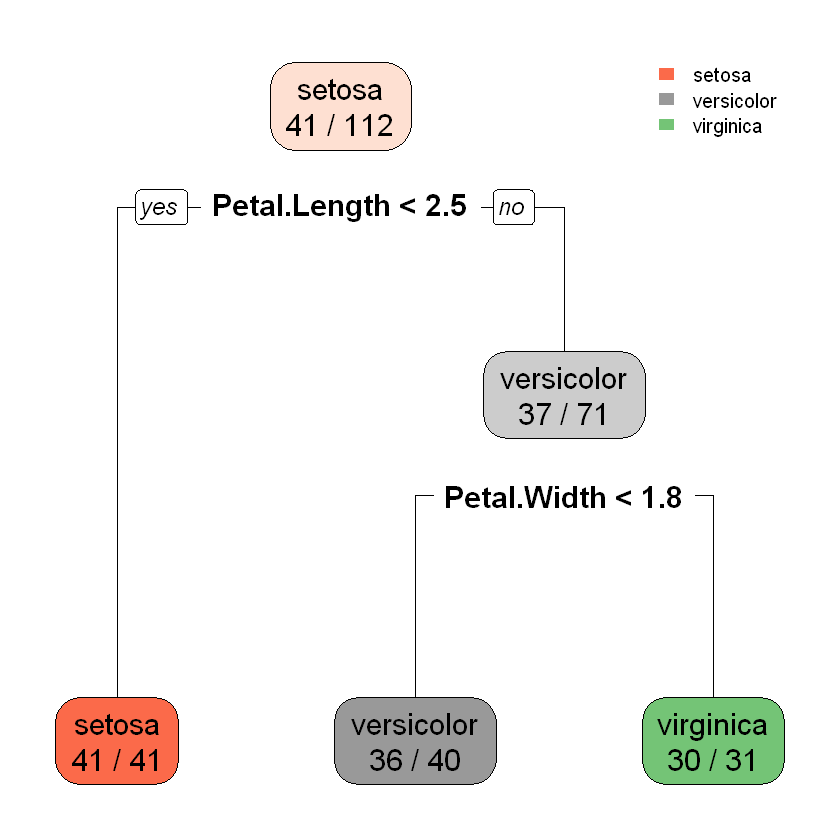

In [45]:
rpart.plot(tree1,extra = 2,cex=1.5)

<b>Interpretation: 

**1.From above tree we observed that if petal length less than 2.5 then probability for setosa is high and if petal length
greater than 2.5 then probability for versicolor and virinica is high and one more observation is about petal width i.e. 
if petal length > 2.5 and and petal width > 1.8 then probability for virginica is high 
and if petal length > 2.5 and and petal width < 1.8 then probability for versicolor is high** 

<b>2.Accuracy on train dataset is 95.54%
   Accuracy on test dataset is 97.37%